# Wrangling Exercises

## Zillow
- For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

- You will have a zillow.ipynb file and a helper file for each section in the pipeline.

## acquire & summarize
1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

    - ***Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.***
    - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
    - Only include properties that include a latitude and longitude value.
2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

- Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is  an atttribute name, the first column is the number of rows with missing values for that attribute, and the second - column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

- Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

## Prepare
1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

    - The input:
        - A dataframe
        - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
        - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
    - The output:
        - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
        - hint:
            - Look up the dropna documentation.
            - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
            - Make use of inplace, i.e. inplace=True/False.
3. Decide how to handle the remaining missing values:

    - Fill with constant value.
    - Impute with mean, median, mode.
    - Drop row/column


## wrangle_zillow.py
Functions of the work above needed to acquire and prepare a new sample of data.

### Mall Customers
### notebook
1. Acquire data from mall_customers.customers in mysql database.
2. Summarize data (include distributions and descriptive statistics).
3. Detect outliers using IQR.
4. Split data (train, validate, and test split).
5. Encode categorical columns using a one hot encoder (pd.get_dummies).
6. Handles missing values.
7. Scaling
### wrangle_mall.py
1. Acquire data from mall_customers.customers in mysql database.
2. Split the data into train, validate, and split
3. One-hot-encoding (pd.get_dummies)
4. Missing values
5. Scaling

In [1]:
# regular imports

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from acquire import get_zillow_data, summarize, nulls_by_col, nulls_by_row, get_mallcustomer_data
from prep import only_single_unit

In [2]:
# acquire our dataframe

In [3]:
df = get_zillow_data()

In [4]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,NaN,...,6.037124e+13,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None


In [5]:
#2.) Summarize the data
summarize(df)

Dataframe head: 
   typeconstructiontypeid  storytypeid  propertylandusetypeid  \
0                     NaN          NaN                  261.0   
1                     NaN          NaN                  261.0   
2                     NaN          NaN                  261.0   

   heatingorsystemtypeid  buildingclasstypeid  architecturalstyletypeid  \
0                    NaN                  NaN                       NaN   
1                    NaN                  NaN                       NaN   
2                    NaN                  NaN                       NaN   

   airconditioningtypeid  parcelid       id  basementsqft  ...  \
0                    NaN  14297519  1727539           NaN  ...   
1                    NaN  17052889  1387261           NaN  ...   
2                    NaN  14186244    11677           NaN  ...   

   censustractandblock  logerror  transactiondate  airconditioningdesc  \
0         6.059063e+13  0.025595       2017-01-01                 None   
1       

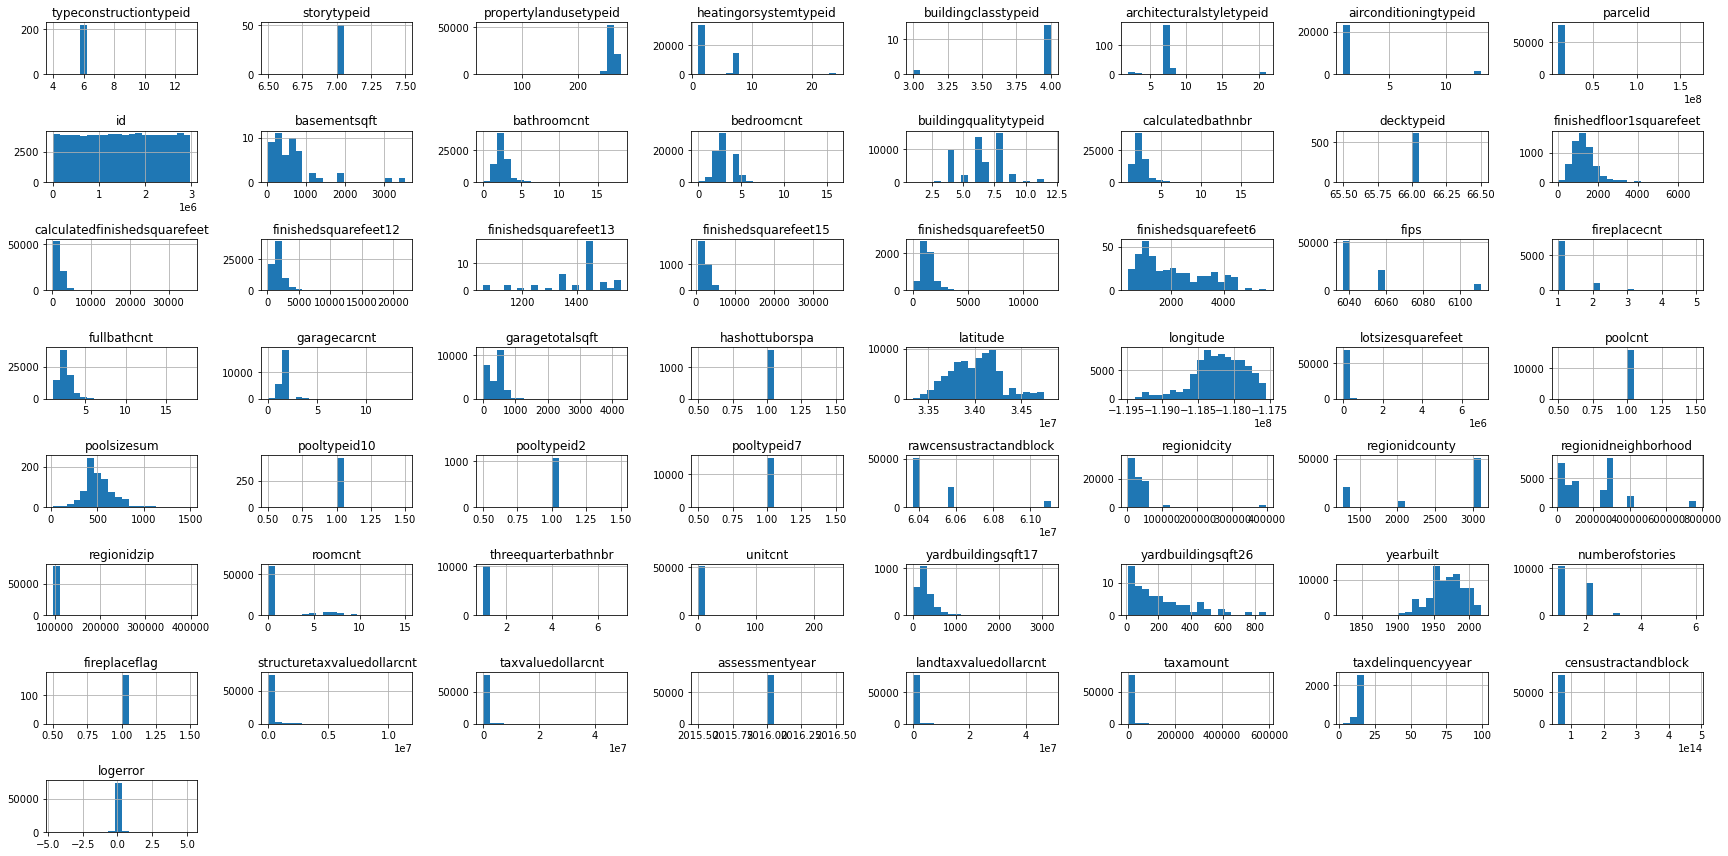

In [6]:
#2.) summarize the data (distributions)
df.hist(figsize=(24, 12), bins=20)
plt.tight_layout()
plt.show()

In [7]:
#3.) Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name
nulls_by_col(df)

<class 'pandas.core.series.Series'>


,num_rows_missing,percent_rows_missing
typeconstructiontypeid,77353,99.713825
storytypeid,77525,99.935546
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,28005,36.100548
buildingclasstypeid,77560,99.980664
...,...,...
buildingclassdesc,77560,99.980664
heatingorsystemdesc,28005,36.100548
propertylandusedesc,0,0.000000
storydesc,77525,99.935546


In [8]:
#maybe for any percentage over 40%, we should just drop it. The rest I'll fill in with the mean.

In [9]:
#4.) Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing
nulls_by_row(df)

,num_cols_missing,percent_cols_missing,num_rows
0,23,33.82352941176471,2
1,24,35.294117647058826,13
2,25,36.76470588235294,24
3,26,38.23529411764706,65
4,27,39.705882352941174,316
5,28,41.17647058823529,457
6,29,42.64705882352941,5285
7,30,44.11764705882353,3465
8,31,45.588235294117645,9911
9,32,47.05882352941176,12606


In [10]:
df = only_single_unit(df)

In [11]:
df

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,NaN,...,6.037124e+13,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None
6,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12095076,781532,NaN,...,6.037461e+13,-0.001011,2017-01-01,Central,None,None,Central,Single Family Residential,None,None
8,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12790562,1246926,NaN,...,6.037500e+13,-0.040966,2017-01-02,None,None,None,Central,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77549,NaN,NaN,261.0,2.0,NaN,NaN,1.0,10855745,2566638,NaN,...,6.037129e+13,0.002138,2017-09-19,Central,None,None,Central,Single Family Residential,None,None
77553,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12401161,1752516,NaN,...,6.037551e+13,-0.232215,2017-09-19,None,None,None,Central,Single Family Residential,None,None
77565,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12892446,1635173,NaN,...,6.037402e+13,0.319408,2017-09-19,None,None,None,Central,Single Family Residential,None,None
77566,NaN,NaN,266.0,2.0,NaN,NaN,NaN,12666457,1684937,NaN,...,6.037621e+13,0.028733,2017-09-19,None,None,None,Central,Condominium,None,None


2.) Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

In [12]:
def handle_missing_values(df, prop_required_columns=0.5, prop_required_row=0.75):
    threshold = int(round(prop_required_columns * len(df.index),0))
    df = df.dropna(axis=1, thresh=threshold)
    threshold = int(round(prop_required_row * len(df.columns),0))
    df = df.dropna(axis=0, thresh=threshold)
    return df

In [14]:
df = handle_missing_values(df, prop_required_columns=0.5, prop_required_row=0.75)

3.) Decide how to handle the remaining missing values.

In [15]:
df.isna().sum()

propertylandusetypeid               0
heatingorsystemtypeid           12136
parcelid                            0
id                                  0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           11594
calculatedbathnbr                   7
calculatedfinishedsquarefeet        0
finishedsquarefeet12             1551
fips                                0
fullbathcnt                         7
latitude                            0
longitude                           0
lotsizesquarefeet                2589
propertycountylandusecode           0
propertyzoningdesc              11498
rawcensustractandblock              0
regionidcity                      833
regionidcounty                      0
regionidzip                        20
roomcnt                             0
unitcnt                         11425
yearbuilt                          26
structuretaxvaluedollarcnt         31
taxvaluedollarcnt                   0
assessmentye

In [16]:
#dropping rows with missing values over 10k
df = df.dropna(subset=['heatingorsystemtypeid','heatingorsystemdesc', 'buildingqualitytypeid','propertyzoningdesc','unitcnt','regionidcity','finishedsquarefeet12','structuretaxvaluedollarcnt','censustractandblock','lotsizesquarefeet'])

In [17]:
df.isna().sum()

propertylandusetypeid           0
heatingorsystemtypeid           0
parcelid                        0
id                              0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       2
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       1
censustractand

In [18]:
df['yearbuilt'].fillna(2017, inplace = True)

## Mall Customers

1.) Acquire data from mall_customers.customers in mysql database

In [19]:
mall_df = get_mallcustomer_data()

2.) Summarize data (include distributions and descriptive statistics).

In [21]:
summarize(mall_df)

Dataframe head: 
             gender  age  annual_income  spending_score
customer_id                                            
1              Male   19             15              39
2              Male   21             15              81
3            Female   20             16               6
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None
Dataframe Description: 
              age  annual_income  spending_score
count  200.000000     200.000000      200.000000
mean    38.850000      60.560000       50.200000
std     13.969007      26.264721       25.823522
min     18.000000      15.000000        1.0

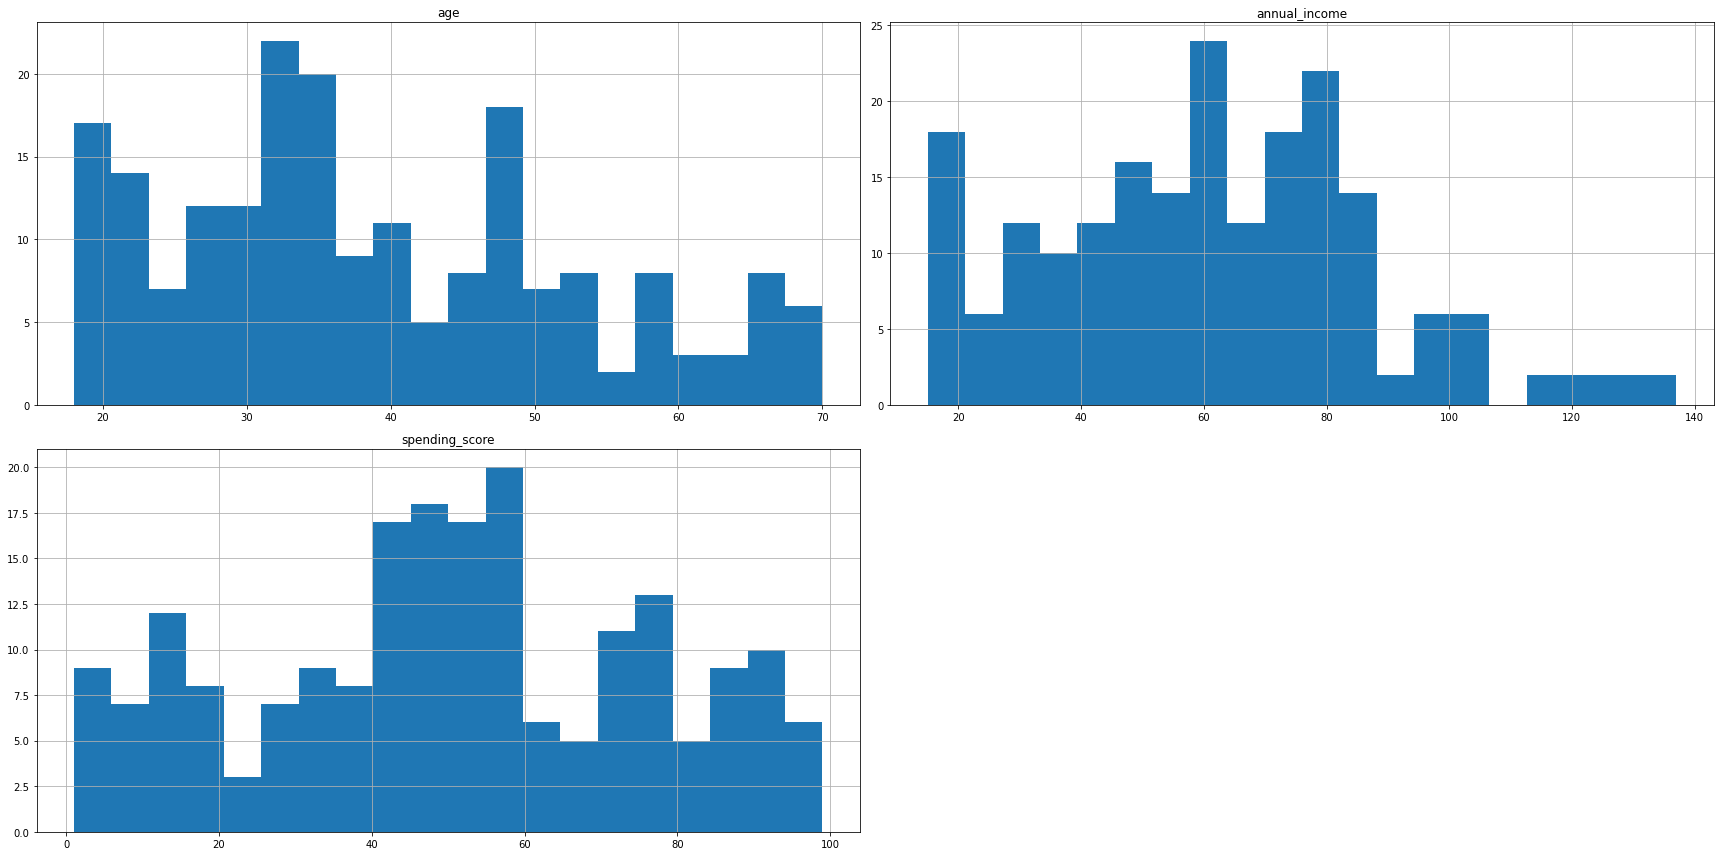

In [22]:
mall_df.hist(figsize=(24, 12), bins=20)
plt.tight_layout()
plt.show()

3.) Detect outliers using IQR.

In [23]:
def get_upper_outliers(s, k=1.5):
    q1, q3 = s.quantile([.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k=1.5):
    for col in df.select_dtypes('number'):
        df[col + '_outliers_upper'] = get_upper_outliers(df[col], k)
    return df

In [24]:
add_upper_outlier_columns(mall_df,k=1.5)

,gender,age,annual_income,spending_score,age_outliers_upper,annual_income_outliers_upper,spending_score_outliers_upper
customer_id,,,,,,,
1,Male,19,15,39,0,0.00,0
2,Male,21,15,81,0,0.00,0
3,Female,20,16,6,0,0.00,0
4,Female,23,16,77,0,0.00,0
5,Female,31,17,40,0,0.00,0
...,...,...,...,...,...,...,...
196,Female,35,120,79,0,0.00,0
197,Female,45,126,28,0,0.00,0
198,Male,32,126,74,0,0.00,0


In [25]:
outlier_cols = [col for col in mall_df.columns if col.endswith('_outliers_upper')]
for col in outlier_cols:
    print(col, ': ')
    subset = mall_df[col][mall_df[col] > 0]
    print(subset.describe())

age_outliers_upper : 
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age_outliers_upper, dtype: float64
annual_income_outliers_upper : 
count    2.00
mean     4.25
std      0.00
min      4.25
25%      4.25
50%      4.25
75%      4.25
max      4.25
Name: annual_income_outliers_upper, dtype: float64
spending_score_outliers_upper : 
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: spending_score_outliers_upper, dtype: float64


4.) Split data (train, validate, and test split).

In [26]:
from sklearn.model_selection import train_test_split
# split df into test (20%) and train_validate (80%)
train_validate, test = train_test_split(df, test_size=.2, random_state=123)

# split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [27]:
train.shape, validate.shape, test.shape

((6824, 34), (2925, 34), (2438, 34))

5.) Encode categorical columns using a one hot encoder (pd.get_dummies).

In [28]:
mall_df.dtypes

gender                            object
age                                int64
annual_income                      int64
spending_score                     int64
age_outliers_upper                 int64
annual_income_outliers_upper     float64
spending_score_outliers_upper      int64
dtype: object

In [29]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # create a mask of columns whether they are object type or not
    mask = np.array(df.dtypes == "object")

        
    # get a list of the column names that are objects (from the mask)
    object_cols = df.iloc[:, mask].columns.tolist()
    
    return object_cols

get_object_cols(mall_df)

In [30]:
pd.get_dummies(mall_df, dummy_na=False)

,age,annual_income,spending_score,age_outliers_upper,annual_income_outliers_upper,spending_score_outliers_upper,gender_Female,gender_Male
customer_id,,,,,,,,
1,19,15,39,0,0.00,0,0,1
2,21,15,81,0,0.00,0,0,1
3,20,16,6,0,0.00,0,1,0
4,23,16,77,0,0.00,0,1,0
5,31,17,40,0,0.00,0,1,0
...,...,...,...,...,...,...,...,...
196,35,120,79,0,0.00,0,1,0
197,45,126,28,0,0.00,0,1,0
198,32,126,74,0,0.00,0,0,1


6.) Handles missing values

In [31]:
#no missing values
mall_df.isna().sum()

gender                           0
age                              0
annual_income                    0
spending_score                   0
age_outliers_upper               0
annual_income_outliers_upper     0
spending_score_outliers_upper    0
dtype: int64

7.) Scaling

In [32]:
def train_validate_test(df, target):
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 20% of the entire dataframe, 
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns train, validate, test sets and also another 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)

    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [33]:
target = 'spending_score'

In [34]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(mall_df, target)

In [35]:
def get_numeric_X_cols(X_train, object_cols):
    '''
    takes in a dataframe and list of object column names
    and returns a list of all other columns names, the non-objects. 
    '''
    numeric_cols = [col for col in X_train.columns.values if col not in object_cols]
    
    return numeric_cols

In [36]:
object_cols = ['gender']
numeric_cols = get_numeric_X_cols(X_train,object_cols)

In [37]:
numeric_cols

['age',
 'annual_income',
 'age_outliers_upper',
 'annual_income_outliers_upper',
 'spending_score_outliers_upper']

In [38]:
from sklearn.preprocessing import MinMaxScaler
def min_max_scale(X_train, X_validate, X_test, numeric_cols):
    '''
    this function takes in 3 dataframes with the same columns, 
    a list of numeric column names (because the scaler can only work with numeric columns),
    and fits a min-max scaler to the first dataframe and transforms all
    3 dataframes using that scaler. 
    it returns 3 dataframes with the same column names and scaled values. 
    '''
    # create the scaler object and fit it to X_train (i.e. identify min and max)
    # if copy = false, inplace row normalization happens and avoids a copy (if the input is already a numpy array).


    scaler = MinMaxScaler(copy=True).fit(X_train[numeric_cols])

    #scale X_train, X_validate, X_test using the mins and maxes stored in the scaler derived from X_train. 
    # 
    X_train_scaled_array = scaler.transform(X_train[numeric_cols])
    X_validate_scaled_array = scaler.transform(X_validate[numeric_cols])
    X_test_scaled_array = scaler.transform(X_test[numeric_cols])

    # convert arrays to dataframes
    X_train_scaled = pd.DataFrame(X_train_scaled_array, 
                                  columns=numeric_cols).\
                                  set_index([X_train.index.values])

    X_validate_scaled = pd.DataFrame(X_validate_scaled_array, 
                                     columns=numeric_cols).\
                                     set_index([X_validate.index.values])

    X_test_scaled = pd.DataFrame(X_test_scaled_array, 
                                 columns=numeric_cols).\
                                 set_index([X_test.index.values])

    
    return X_train_scaled, X_validate_scaled, X_test_scaled


In [39]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, numeric_cols)